In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 生成随机数据
X = np.random.rand(100, 1) * 10  # 100个样本，1个特征
y = (X > 5).astype(int)  # 标签为0或1

# 转换为PyTorch张量
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [3]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 输入特征数为1，输出特征数为1

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)  # 使用sigmoid函数将输出限制在0和1之间

In [5]:
model = LogisticRegressionModel()
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降

# 训练模型
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.7651
Epoch [200/1000], Loss: 0.7180
Epoch [300/1000], Loss: 0.6752
Epoch [400/1000], Loss: 0.6365
Epoch [500/1000], Loss: 0.6016
Epoch [600/1000], Loss: 0.5701
Epoch [700/1000], Loss: 0.5416
Epoch [800/1000], Loss: 0.5160
Epoch [900/1000], Loss: 0.4928
Epoch [1000/1000], Loss: 0.4718


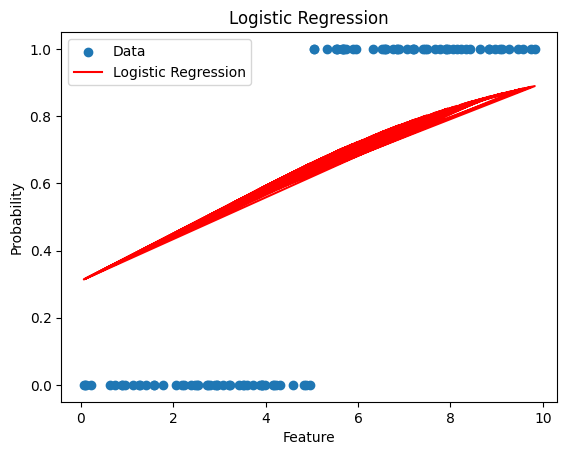

In [6]:
model.eval()
with torch.no_grad():
    predictions = model(X_train).numpy()

plt.scatter(X, y, label='Data')
plt.plot(X, predictions, color='r', label='Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.legend()
plt.show()